In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [5]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
print(train_labels[0])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

9


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

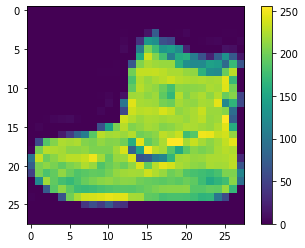

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

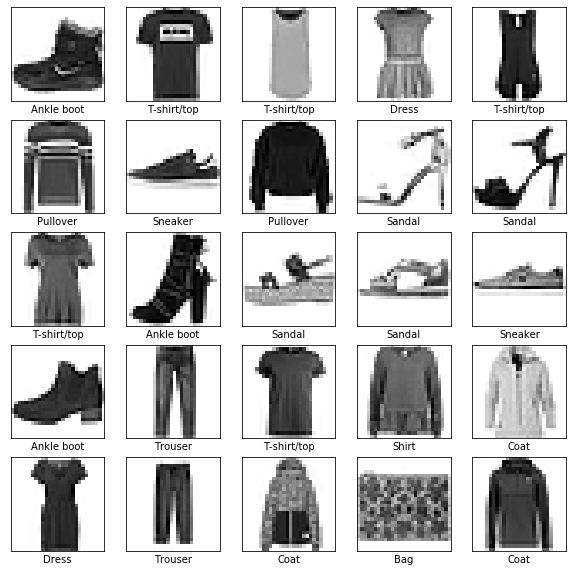

In [15]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10)])

In [19]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4956 - accuracy: 0.8283
Epoch 2/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3707 - accuracy: 0.8659
Epoch 3/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3353 - accuracy: 0.8795
Epoch 4/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3112 - accuracy: 0.8863
Epoch 5/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2940 - accuracy: 0.8923
Epoch 6/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2794 - accuracy: 0.8958
Epoch 7/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2683 - accuracy: 0.9004
Epoch 8/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2568 - accuracy: 0.9048
Epoch 9/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2468 - accuracy: 0.9070
Epoch 10/20
60

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3524 - accuracy: 0.8870

 Test accuracy: 0.887


In [21]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediction = probability_model.predict(test_images)
prediction[0]

array([4.0913206e-10, 1.3004974e-08, 2.3554627e-08, 4.8164273e-09,
       5.0002576e-08, 5.1708885e-06, 2.9582702e-07, 6.5738317e-03,
       4.4213935e-10, 9.9342066e-01], dtype=float32)

In [23]:
np.argmax(prediction[0])


9

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    print(predicted_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

9


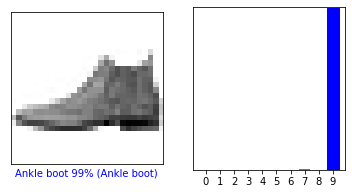

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

9
2
1
1
0
1
4
6
5
7
4
5
7
3
4


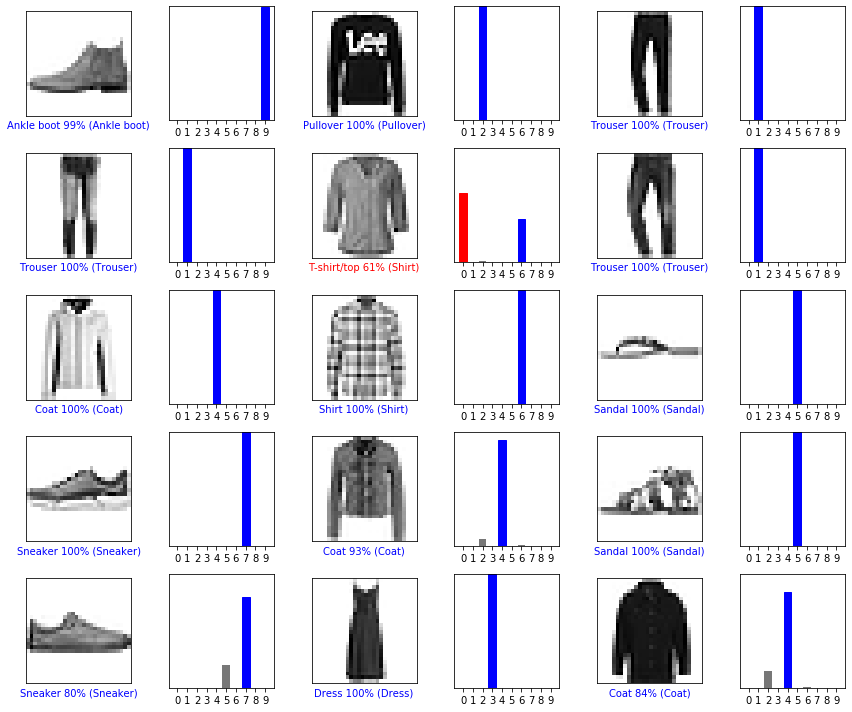

In [41]:
num_rows = 5
num_columns = 3

num_images = num_rows * num_columns
plt.figure(figsize=(2*2*num_columns, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_columns * 2, 2*i+1)
    plot_image(i, prediction[i], test_labels, test_images)
    plt.subplot(num_rows, num_columns * 2, 2*i + 2)
    plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()


In [42]:
img = test_images[3]
print(img.shape)

(28, 28)


In [44]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 1, 28, 28)


In [45]:
nimg = (np.expand_dims(img, 0))
print(nimg.shape)

(1, 1, 1, 28, 28)


In [46]:
n2img = (np.expand_dims(test_images[3],0))
print(n2img.shape)

(1, 28, 28)


In [47]:
predictions_single = probability_model.predict(n2img)
print(predictions_single)

[[6.2173879e-09 1.0000000e+00 1.7348419e-12 2.6647136e-08 7.5087792e-12
  3.6386796e-25 3.5695130e-10 2.8471205e-27 1.0465744e-12 4.9858924e-24]]


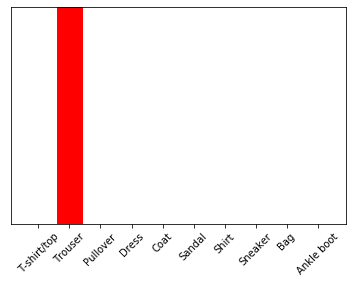

In [48]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

1


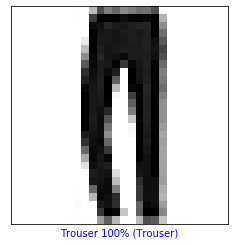

In [52]:
plot_image(2, predictions_single[0], test_labels, test_images)

In [53]:
np.argmax(predictions_single[0])

1

In [55]:
test_images.shape


(10000, 28, 28)

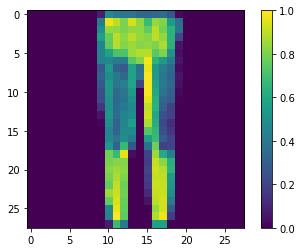

In [56]:
plt.figure()
plt.imshow(test_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

1


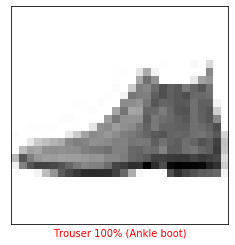

In [57]:
plot_image(0, predictions_single[0], test_labels, test_images)

In [58]:
for i in range(num_images):
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
